In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\asnsu\ICT\Assignment 1\auto-mpg.csv")

1. Whatis the distribution of miles per gallon (mpg) in the dataset?
Plot a histogram of mpg values.


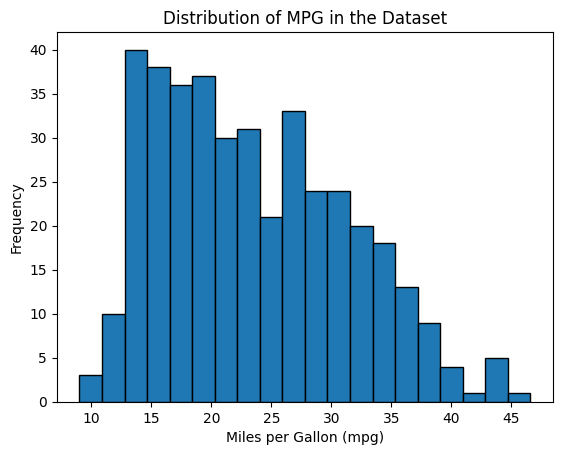

In [ ]:
plt.hist(df["mpg"], bins=20, edgecolor="black")
plt.xlabel("Miles per Gallon (mpg)")
plt.ylabel("Frequency")
plt.title("Distribution of MPG in the Dataset")
plt.show()

How does mpg vary with the number of cylinders?
Use a boxplot to compare mpg across different cylinders.

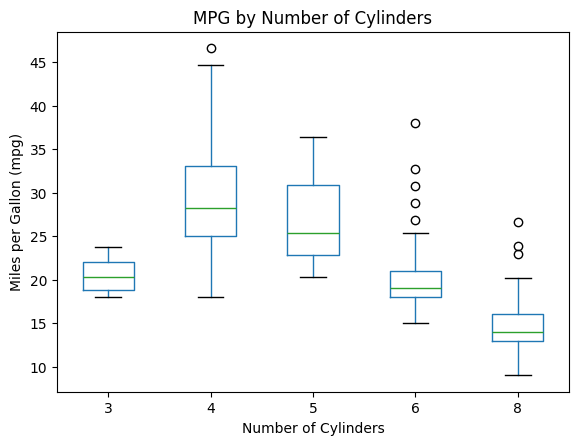

In [ ]:
df.boxplot(column="mpg", by="cylinders", grid=False)
plt.xlabel("Number of Cylinders")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("MPG by Number of Cylinders")
plt.suptitle("")
plt.show()

Is there a relationship between horsepower and mpg? Summarize your
observation
Plot a scatter plot of horsepower vs. mpg.


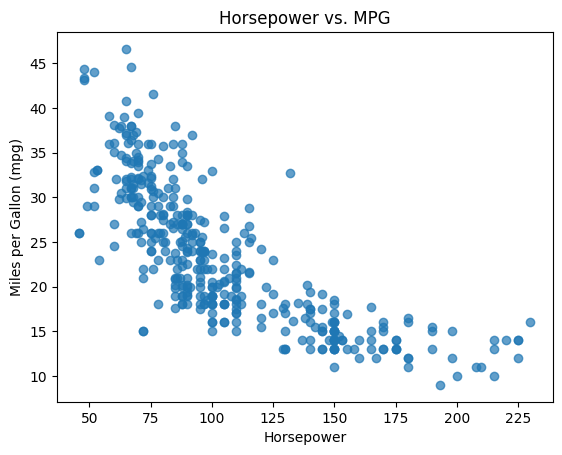

In [ ]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df_hp = df.dropna(subset=["horsepower"])
plt.scatter(df_hp["horsepower"], df_hp["mpg"], alpha=0.7)
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Horsepower vs. MPG")
plt.show()

How does car weight influence mpg?
Plot a scatter plot with a trend line for weight vs. mpg.

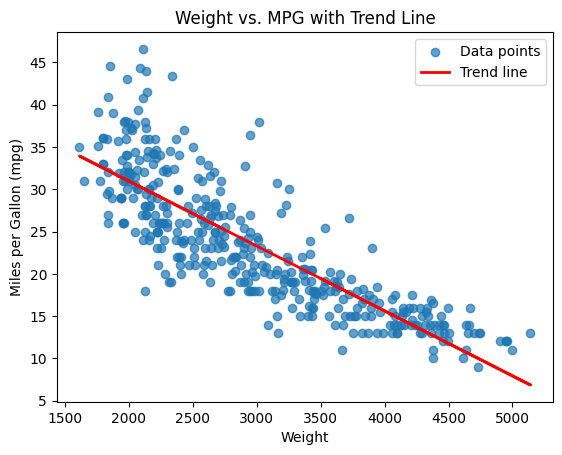

In [ ]:
import numpy as np

plt.scatter(df["weight"], df["mpg"], alpha=0.7, label="Data points")
z = np.polyfit(df["weight"], df["mpg"], 1)
p = np.poly1d(z)
plt.plot(df["weight"], p(df["weight"]), color="red", linewidth=2, label="Trend line")
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Weight vs. MPG with Trend Line")
plt.legend()
plt.show()

Whatis the trend of average mpg across model years?
Plot a line chart of average mpg per model year.

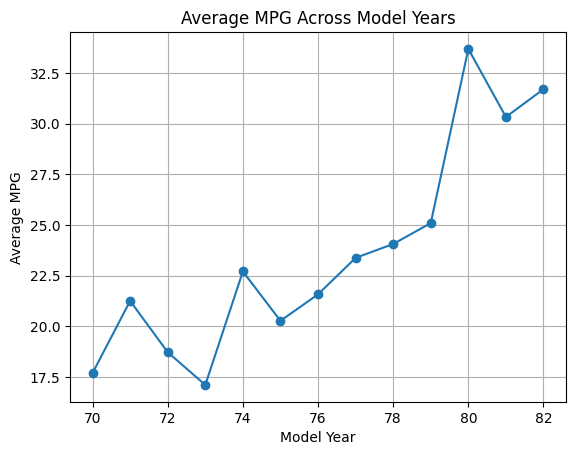

In [ ]:
avg_mpg_per_year = df.groupby("model year")["mpg"].mean()
plt.plot(avg_mpg_per_year.index, avg_mpg_per_year.values, marker="o")
plt.xlabel("Model Year")
plt.ylabel("Average MPG")
plt.title("Average MPG Across Model Years")
plt.grid(True)
plt.show()

How is the count of cars distributed by origin?
Use a bar chart to show the number of carsfor each origin.

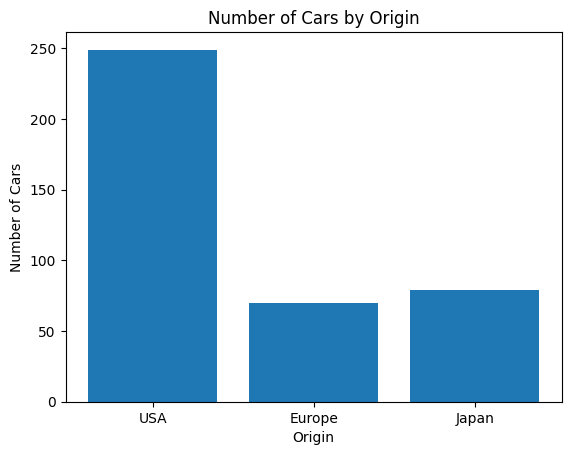

In [ ]:
origin_counts = df["origin"].value_counts().sort_index()
origin_labels = {1: "USA", 2: "Europe", 3: "Japan"}
plt.bar(origin_counts.index.map(origin_labels), origin_counts.values)
plt.xlabel("Origin")
plt.ylabel("Number of Cars")
plt.title("Number of Cars by Origin")
plt.show()

How do acceleration values vary across different cylinders?
Use a boxplot of acceleration grouped by cylinders.


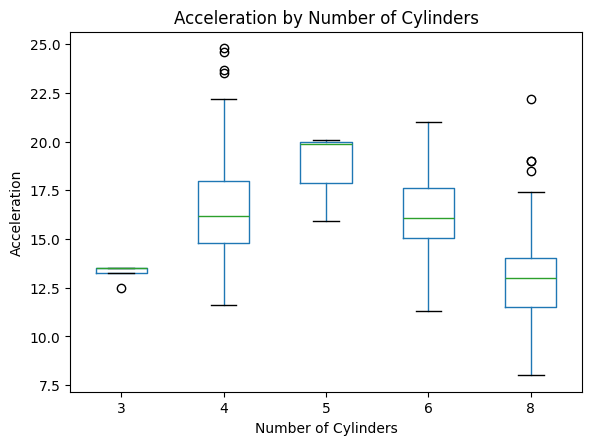

In [ ]:
df.boxplot(column="acceleration", by="cylinders", grid=False)
plt.xlabel("Number of Cylinders")
plt.ylabel("Acceleration")
plt.title("Acceleration by Number of Cylinders")
plt.suptitle("")
plt.show()

Which year had the most number of car entries?
Plot a histogram or bar chart of car counts by model year

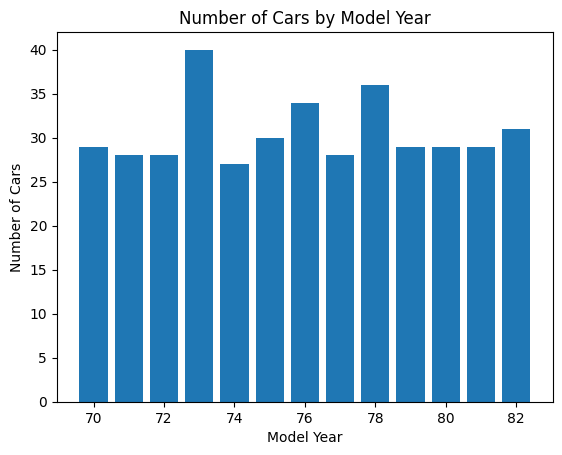

The year with the most car entries is 73 with 40 cars.


In [ ]:
car_counts_by_year = df["model year"].value_counts().sort_index()
plt.bar(car_counts_by_year.index, car_counts_by_year.values)
plt.xlabel("Model Year")
plt.ylabel("Number of Cars")
plt.title("Number of Cars by Model Year")
plt.show()

most_cars_year = car_counts_by_year.idxmax()
most_cars_count = car_counts_by_year.max()
print(
    f"The year with the most car entries is {most_cars_year} with {most_cars_count} cars."
)

Is there a clustering pattern among weight, horsepower, and mpg?
Create a 3D scatter plot of these three variables.


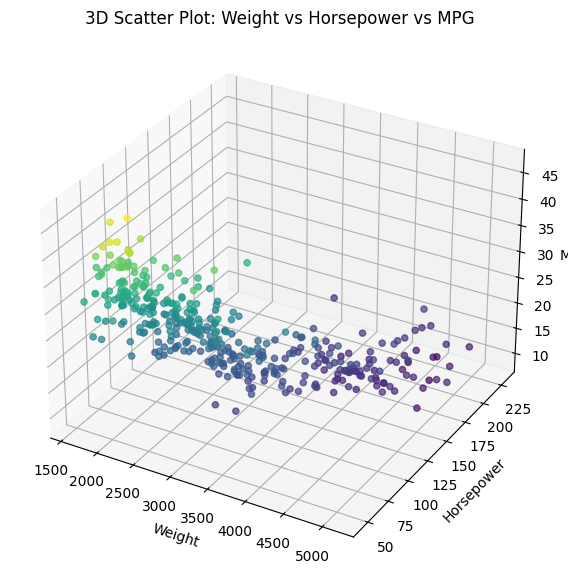

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    df_hp["weight"],
    df_hp["horsepower"],
    df_hp["mpg"],
    c=df_hp["mpg"],
    cmap="viridis",
    alpha=0.7,
)
ax.set_xlabel("Weight")
ax.set_ylabel("Horsepower")
ax.set_zlabel("MPG")
ax.set_title("3D Scatter Plot: Weight vs Horsepower vs MPG")
plt.show()

Which 10 cars have the bestfuel efficiency?
Plot a horizontal bar chartshowing the top 10 car names with the highest mpg.

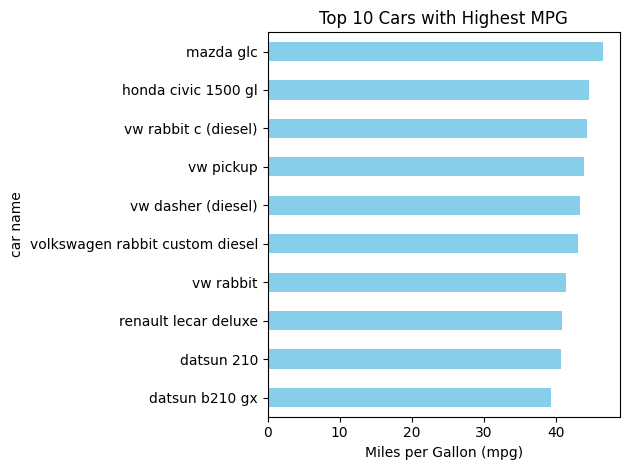

In [ ]:
top10_cars = (
    df.nlargest(10, "mpg")[["car name", "mpg"]].set_index("car name").sort_values("mpg")
)
top10_cars["mpg"].plot(kind="barh", color="skyblue")
plt.xlabel("Miles per Gallon (mpg)")
plt.title("Top 10 Cars with Highest MPG")
plt.tight_layout()
plt.show()